# 주제 : 미국의 대통령은 어떻게 뽑힐까?
----------

## 실습 가이드
    1. 데이터를 다운로드하여 Colab에 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    
    
## 데이터 소개
    - 이번 주제는 US Election 2020 데이터셋을 사용합니다.
    
    - 총 11개의 파일 중 정보가 가장 많은 2개의 파일을 사용합니다.
    president_county_candidate.csv: 대통령 투표 결과
    governors_county_candidate.csv: 카운티 지사 투표 결과
    
    - 총 1개의 보조 데이터를 이용합니다.
    acs2017_county_data.csv: 카운티별 인구조사 데이터
    
    - 각 파일의 컬럼은 아래와 같습니다.
    state: 주
    county: 카운티(군)
    district: 지구
    candidate: 후보자
    party: 후보자의 소속 정당
    total_votes: 득표 수
    won: 지역 투표 우승 여부
    
    
    
- 데이터 출처: https://www.kaggle.com/unanimad/us-election-2020
- 보조 데이터: https://www.kaggle.com/muonneutrino/us-census-demographic-data

## 최종 목표
    - 보조 데이터셋을 이용하여 데이터셋 보강하는 방법 이해
    - plotly를 이용한 Choropleth 시각화 방법 이해
    - Regression과 Classification의 차이 이해

- 출제자 : 신제용 강사
---

## Step 0. 데이터에 관한 사전 배경 지식

### 미국의 선거 제도에 대하여


### 2020 미국 선거 데이터셋 설명


### 2017 미국 인구조사 데이터셋(보조 데이터셋) 설명

## Step 1. 데이터셋 준비하기

- geopandas :   벡터 데이터 작업을 위한 라이브러리(공간 데이터 처리에 유용하게 사용)
- pyshp : shape file을 다루기 위한 라이브러리
- shapely : 평면 형상 처리와 분석
- plotly-geo : 데이터 시각화 툴(=matplotlib)

In [1]:
!pip install geopandas
!pip install pyshp
!pip install shapely
!pip install plotly-geo

     |████████████████████████████████| 1.0 MB 5.0 MB/s 
     |████████████████████████████████| 16.7 MB 46.8 MB/s 
     |████████████████████████████████| 6.3 MB 44.5 MB/s 
     |████████████████████████████████| 44 kB 1.6 MB/s 
     |████████████████████████████████| 23.7 MB 68.3 MB/s 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 문제 1. Colab Notebook에 Kaggle API 세팅하기


In [3]:
import os

In [5]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
os.environ['KAGGLE_USERNAME'] = 'puddinghong'


### 문제 2. 데이터 다운로드 및 압축 해제하기


In [9]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기
!kaggle datasets download -d unanimad/us-election-2020
!kaggle datasets download -d muonneutrino/us-census-demographic-data
!unzip '*.zip'

us-election-2020.zip: Skipping, found more recently modified local copy (use --force to force download)
us-census-demographic-data.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  us-election-2020.zip
  inflating: governors_county.csv    
  inflating: governors_county_candidate.csv  
  inflating: governors_state.csv     
  inflating: house_candidate.csv     
  inflating: house_state.csv         
  inflating: president_county.csv    
  inflating: president_county_candidate.csv  
  inflating: president_state.csv     
  inflating: senate_county.csv       
  inflating: senate_county_candidate.csv  
  inflating: senate_state.csv        

Archive:  us-census-demographic-data.zip
  inflating: acs2015_census_tract_data.csv  
  inflating: acs2015_county_data.csv  
  inflating: acs2017_census_tract_data.csv  
  inflating: acs2017_county_data.csv  

2 archives were successfully processed.


### 문제 3. Pandas 라이브러리로 csv파일 읽어들이기


In [10]:
# from US Election 2020
df_pres = pd.read_csv('president_county_candidate.csv')
df_gov = pd.read_csv('governors_county_candidate.csv')

# from US Census 2017
df_census = pd.read_csv('acs2017_census_tract_data.csv')

- pd.read_html('url')[index] :  html페이지에 <table>tag 로 구성된 부분을 가져와 표로 만들어진 목록을 만들어줌   
- 아래 html에는 표가 두 개 있으므로 첫 번째 표를 가져오기 위해 [0]으로 인덱스 번호 지정함


In [11]:
# State Code 관련 부가 자료
state_code = pd.read_html('https://www.infoplease.com/us/postal-information/state-abbreviations-and-state-postal-codes')[0]

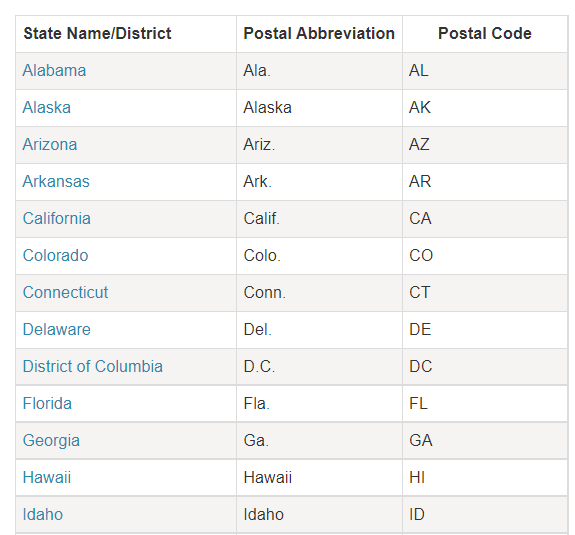

## Step 2. EDA 및 데이터 기초 통계 분석


### 문제 4. 각 데이터프레임 구조 및 기초 통계 확인하기


In [12]:
# DataFrame에서 제공하는 메소드를 이용하여 각 데이터프레임의 구조 분석하기 (head(), info(), describe())
df_pres.head()

,state,county,candidate,party,total_votes,won
0,Delaware,Kent County,Joe Biden,DEM,44552,True
1,Delaware,Kent County,Donald Trump,REP,41009,False
2,Delaware,Kent County,Jo Jorgensen,LIB,1044,False
3,Delaware,Kent County,Howie Hawkins,GRN,420,False
4,Delaware,New Castle County,Joe Biden,DEM,195034,True


- DEM : 민주당(바이든)   
- REP : 공화당(트럼프)   

In [18]:
# 후보자 확인
# Write_ins는 사람 아님
df_pres['candidate'].unique()

array(['Joe Biden', 'Donald Trump', 'Jo Jorgensen', 'Howie Hawkins',
       ' Write-ins', 'Gloria La Riva', 'Brock Pierce',
       'Rocky De La Fuente', 'Don Blankenship', 'Kanye West',
       'Brian Carroll', 'Ricki Sue King', 'Jade Simmons',
       'President Boddie', 'Bill Hammons', 'Tom Hoefling',
       'Alyson Kennedy', 'Jerome Segal', 'Phil Collins',
       ' None of these candidates', 'Sheila Samm Tittle', 'Dario Hunter',
       'Joe McHugh', 'Christopher LaFontaine', 'Keith McCormic',
       'Brooke Paige', 'Gary Swing', 'Richard Duncan', 'Blake Huber',
       'Kyle Kopitke', 'Zachary Scalf', 'Jesse Ventura', 'Connie Gammon',
       'John Richard Myers', 'Mark Charles', 'Princess Jacob-Fambro',
       'Joseph Kishore', 'Jordan Scott'], dtype=object)

In [20]:
# 투표수 확인
df_pres.loc[df_pres['candidate']=='Kanye West']['total_votes'].sum()

66367

In [13]:
df_gov.head()

,state,county,candidate,party,votes,won
0,Delaware,Kent County,John Carney,DEM,44352,True
1,Delaware,Kent County,Julianne Murray,REP,39332,False
2,Delaware,Kent County,Kathy DeMatteis,IPD,1115,False
3,Delaware,Kent County,John Machurek,LIB,616,False
4,Delaware,New Castle County,John Carney,DEM,191678,True


In [14]:
df_census.head()

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,1.2,0.0,1407,67826.0,14560.0,33018.0,6294.0,10.7,20.8,38.5,15.6,22.8,10.8,12.4,94.2,3.3,0.0,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,1.0,0.0,1652,41287.0,3819.0,18996.0,2453.0,22.4,35.8,30.5,24.9,22.9,6.3,15.4,90.5,9.1,0.0,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,1001020300,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,0.7,0.4,2480,46806.0,9496.0,21236.0,2562.0,14.7,21.1,27.9,19.4,33.3,9.9,9.6,88.3,8.4,0.0,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,1001020400,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,0.2,0.0,3257,55895.0,4369.0,28068.0,3190.0,2.3,1.7,29.0,16.6,25.8,9.1,19.5,82.3,11.2,0.0,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,1001020500,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,3.1,0.0,7229,68143.0,14424.0,36905.0,10706.0,12.2,17.9,48.8,13.8,20.5,3.5,13.4,86.9,11.2,0.0,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3


- TractId는 county를 더 잘게 쪼갠 것   
- TotalPop, Men, Women은 실제 수로 기입하여 덧셈 가능   
- Hispanic등 데이터가 소수점인 컬럼은 퍼센트이므로 단순히 더하면 안 됨

In [21]:
df_census['County'].value_counts()

Los Angeles County    2346
Cook County           1326
Orange County          939
Maricopa County        916
Montgomery County      833
                      ... 
Real County              1
Hitchcock County         1
Reagan County            1
Hooker County            1
Cochran County           1
Name: County, Length: 1955, dtype: int64

큰 county는 잘게 쪼개서 투표함을 알 수 있다.   
ex) LA는 2346개, Hitchcock는 1개

In [15]:
state_code.head()

,State Name/District,Postal Abbreviation,Postal Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


### 문제 5. County 별 통계로 데이터프레임 구조 변경하기


In [ ]:
# 모든 데이터프레임의 index를 County로 변경하기






### 문제 6. 여러 데이터프레임을 하나의 데이터프레임으로 결합하기

In [ ]:
# df_pres, df_gov, df_census 데이터프레임을 하나로 결합하기





### 문제 7. 컬럼간의 Correlation을 Heatmap으로 표현하기


In [ ]:
# DataFrame의 corr() 메소드와 Seaborn의 heatmap() 메소드를 이용하여 Pearson's correlation 시각화하기





### 문제 8. Seaborn을 이용하여 연관성 높은 데이터의 Jointplot 확인

## Step 3. Plotly를 이용하여 데이터 시각화하기


### 문제 9. Plotly의 Choropleth 데이터 포맷으로 맞추기

In [ ]:
import plotly.figure_factory as ff

# FIPS 코드 불러오기
df_sample = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/laucnty16.csv')
df_sample['State FIPS Code'] = df_sample['State FIPS Code'].apply(lambda x: str(x).zfill(2))
df_sample['County FIPS Code'] = df_sample['County FIPS Code'].apply(lambda x: str(x).zfill(3))
df_sample['FIPS'] = df_sample['State FIPS Code'] + df_sample['County FIPS Code']

# Color Scale 세팅
colorscale = ["#f7fbff","#ebf3fb","#deebf7","#d2e3f3","#c6dbef","#b3d2e9","#9ecae1",
              "#85bcdb","#6baed6","#57a0ce","#4292c6","#3082be","#2171b5","#1361a9",
              "#08519c","#0b4083","#08306b"]

In [ ]:
# ff.create_choropleth()에서 사용할 수 있도록 데이터프레임 정리하기
# Hint) 공식 레퍼런스 참조: https://plotly.com/python/county-choropleth/#the-entire-usa








### 문제 10. Choropleth map 시각화하기

In [ ]:
# ff.create_choropleth() 메소드를 이용하여 Choropleth 플랏하기
# Hint) 공식 레퍼런스 참조: https://plotly.com/python/county-choropleth/#the-entire-usa

fig = ff.create_choropleth(...)



fig.layout.template = None
fig.show()

## Step 4. 모델 학습을 위한 데이터 전처리 

### 문제 11. 학습을 위한 데이터프레임 구성하기

In [ ]:
# 투표 결과에 해당하는 데이터는 입력 데이터에서 제거한다.
# 예측 타겟은 DEM vs. REP 투표 비율로 한다.

X =
y =

### 문제 12. StandardScaler를 이용해 수치형 데이터 표준화하기


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# StandardScaler를 이용해 수치형 데이터를 표준화하기
scaler =
X = 



### 문제 13. 학습데이터와 테스트데이터 분리하기


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = 

### 문제 14. PCA를 이용해 데이터 전처리 수행하기

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# PCA를 이용해 Dimensionality Reduction 수행하기
pca =






## Step 4. Regression 모델 학습하기

### 문제 15. LightGBM Regression 모델 학습하기

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
# XGBRegressor 모델 생성/학습. Feature에 PCA 적용하기
model_reg = 




### 문제 16. Regression 모델 정확도 출력하기

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import classification_report
from math import sqrt

In [ ]:
# Predict를 수행하고 mean_absolute_error, mean_squared_error, classification_report 결과 출력하기
pred = 





## Step 5. Classification 모델 학습하기


### 문제 17. XGBoost 모델 생성/학습하기


In [ ]:
from xgboost import XGBClassifier

In [ ]:
# XGBClassifier 모델 생성/학습
model_cls = 





### 문제 18. Classifier의 Feature Importance 시각화하기


In [ ]:
# XGBClassifier 모델의 feature_importances_ 속성 시각화





### 문제 19. Classifier 모델 정확도 출력하기

In [ ]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = 



